# Introduction to Photonics II

## Lecture 7



Frank Cichos
SS2019

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import miepython as mp

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 


plt.rcParams.update({'font.size': 16,
                     'axes.titlesize': 16,
                     'axes.labelsize': 14,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',})  

# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

During the last lecture we have developed an understanding of the optical response of noble metals based on the Drude model (free electrons) and the interband transitions which we have described in terms of damped driven harmonic oscillators. The theoretical calculations are repeated here to base our future calculations for the plasmon resonance in thin films and particles on it. 

## Drude-Sommerfeld theory  (repetition)

In [8]:
#Drude-Sommerfeld dielectric function
def epsilon_d(omega,gamma,omega_p):
    return(1-omega_p**2/(omega**2+1j*gamma*omega))

#conversion from wavelength in angular frequency
def freq(lam): # supply wavelength in nm
    c=299792458 # speed of light m/s
    return(2*np.pi*c/(lam*1e-9))

In [9]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14

#wavelength range
#wavelength=np.arange(400,1000,1)

#dielectric function, complex!
epsilon=epsilon_d(freq(wavelength),gamma_d,omega_p_d)

NameError: name 'wavelength' is not defined

## Interband transition  (repetition)

In [10]:
def epsilon_I(omega,gamma,omega_p,omega0):
    return(1+omega_p**2/((omega_0**2-omega**2)-1j*gamma*omega)+6)

In [11]:
# parameters for gold
omega_p_I=45e14
gamma_I=9e14
c=299792458
omega_0=2*np.pi*c/(450e-9)

c=299792458
#wavelength range
wavelength=np.arange(300,1000,1)

#dielectric function, complex!
epsilon=epsilon_I(freq(wavelength),gamma_I,omega_p_I,omega_0)
eps_all=epsilon+epsilon_d(freq(wavelength),gamma_d,omega_p_d)

In [12]:
## experimental data from Christy % Johnson
ref_lam=np.array([0.1879,0.1916,0.1953,0.1993,0.2033,0.2073,0.2119,0.2164,0.2214,0.2262,0.2313,0.2371,0.2426,0.2490,0.2551,0.2616,0.2689,0.2761,0.2844,0.2924,0.3009,0.3107,0.3204,0.3315,0.3425,0.3542,0.3679,0.3815,0.3974,0.4133,0.4305,0.4509,0.4714,0.4959,0.5209,0.5486,0.5821,0.6168,0.6595,0.7045,0.7560,0.8211,0.8920,0.9840,1.0880,1.2160,1.3930,1.6100,1.9370])
ref_n=np.array([1.28,1.32,1.34,1.33,1.33,1.30,1.30,1.30,1.30,1.31,1.30,1.32,1.32,1.33,1.33,1.35,1.38,1.43,1.47,1.49,1.53,1.53,1.54,1.48,1.48,1.50,1.48,1.46,1.47,1.46,1.45,1.38,1.31,1.04,0.62,0.43,0.29,0.21,0.14,0.13,0.14,0.16,0.17,0.22,0.27,0.35,0.43,0.56,0.92])
ref_k=np.array([1.188,1.203,1.226,1.251,1.277,1.304,1.350,1.387,1.427,1.460,1.497,1.536,1.577,1.631,1.688,1.749,1.803,1.847,1.869,1.878,1.889,1.893,1.898,1.883,1.871,1.866,1.895,1.933,1.952,1.958,1.948,1.914,1.849,1.833,2.081,2.455,2.863,3.272,3.697,4.103,4.542,5.083,5.663,6.350,7.150,8.145,9.519,11.21,13.78])

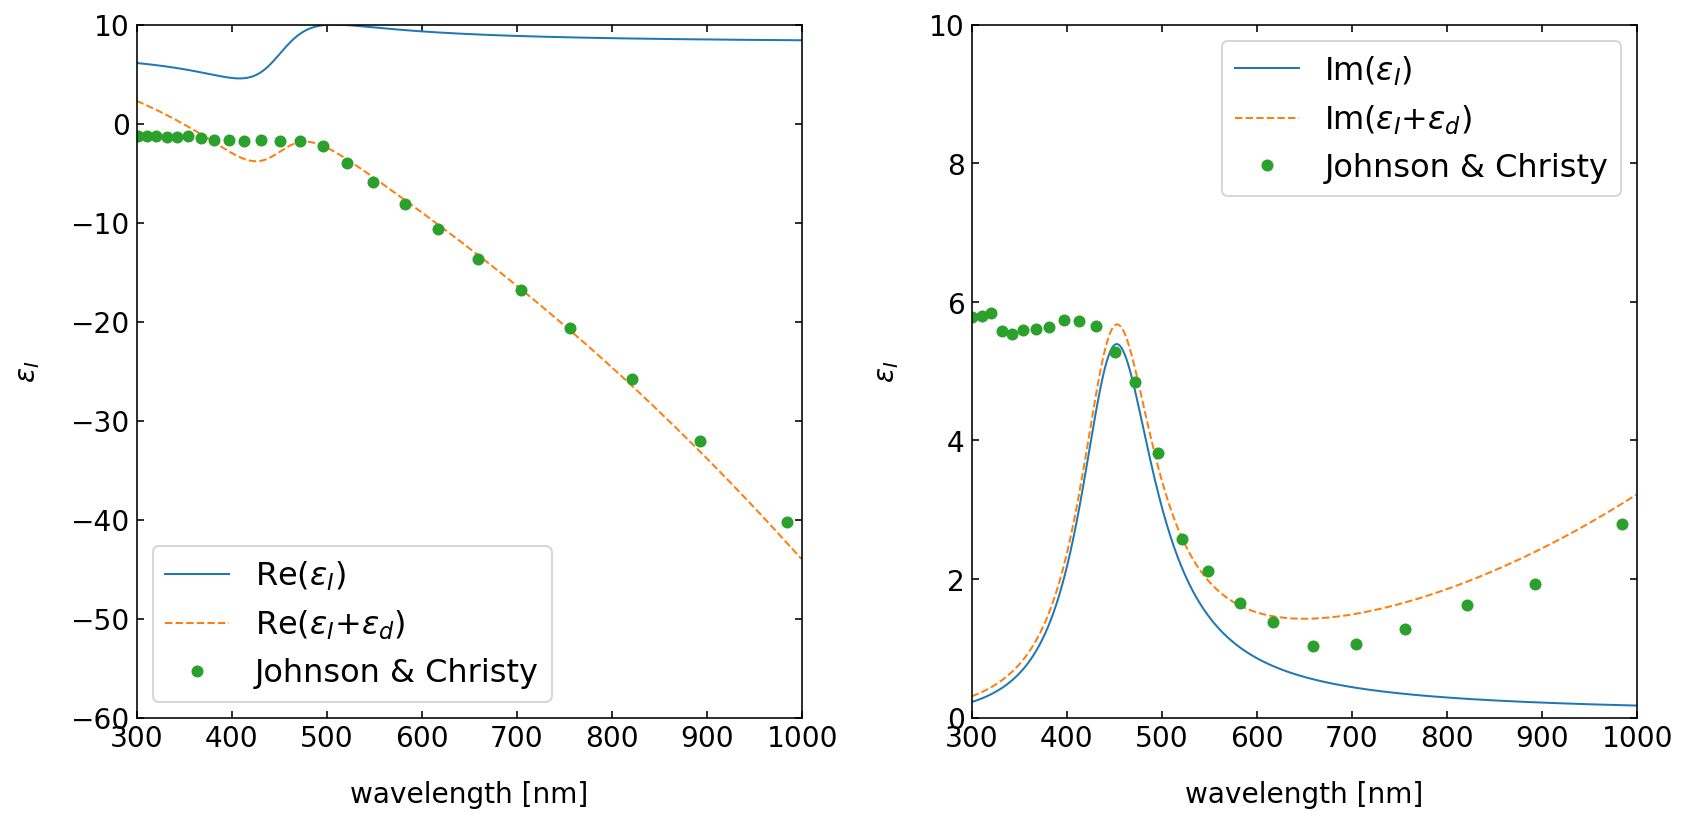

In [13]:
fig=plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(wavelength,np.real(epsilon),label='Re($\epsilon_{I}$)')
plt.plot(wavelength,np.real(eps_all),'--',label='Re($\epsilon_{I}$+$\epsilon_{d}$)')
plt.plot(ref_lam*1000,ref_n**2-ref_k**2,'.',label='Johnson & Christy')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\epsilon_{I}$')
plt.xlim(300,1000)
plt.ylim(-60,10)
plt.legend()

plt.subplot(122)
plt.plot(wavelength,np.imag(epsilon),label='Im($\epsilon_{I}$)')
plt.plot(wavelength,np.imag(eps_all),'--',label='Im($\epsilon_{I}$+$\epsilon_{d}$)')
plt.plot(ref_lam*1000,2*ref_n*ref_k,'.',label='Johnson & Christy')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\epsilon_{I}$')
plt.xlim(300,1000)
plt.ylim(0,10)
plt.legend()
plt.tight_layout()
plt.show()


The graph below sketches the origin of the actual transition on the band structure that is intrinsic to most noble metals. Au and Ag consist of filled d-bands and a partially filled sp-band (conduction band). Two types of transitions are allowed. On one side plasmonic excitation collectively excited the sp-band electrons. In the band structure language, this means that the electrons do a vertical transition at a well specified wavenumber (k). These transitions are called **intraband transition**. As there are only unoccupied states in the conduction band at different k-vectors, photons have to participate in the transition, which make them indirect and thus less likely. There are on the other hand also direct transition from the d-band to the sp-band possible. These are accordingly the **interband transitions**. These direct transition have a much higher transition probability, but the energetic position of the top of the d-band shifts them to the short wavelength edge of the visible spectrum for Au and completly to the UV in Ag. The optical transitions in silver, for example, are therefore solely determined by intraband transitions.  

![Band Structure Nobe Metal](bandstructure.png)

By definition surface plasmons are the quanta of surface-charge-density oscillations, but the same terminology is commonly used for collective oscillations in the electron density at the surface of a metal. The surface charge oscillations are naturally coupled to electromagnetic waves, which explains their designation as polaritons. In this section, we consider a plane interface between two media. One medium is characterized by a general, complex frequency-dependent dielectric function $\epsilon_{1}(\omega)$ whereas the dielectric function of the other medium $\epsilon_{2}(\omega)$ is assumed to be real. We choose the interface to coincide with the plane $z = 0$ of a Cartesian coordinate system. We are looking for homogeneous solutions of Maxwell's equations that are localized at the interface. A homogeneous solution is an eigenmode of the system, i.e. a solution that exists without external excitation. Mathematically, it is the solution of the wave equation

![Figure 1](geometry.png)

\begin{equation}
\nabla\times\nabla\times{\bf E}({\bf r},\omega)-\frac{\omega^2}{c^2}\epsilon({\bf r},\omega){\bf E}({\bf r},\omega)=0
\end{equation}

with $\epsilon({\bf r},\omega) = \epsilon_{1}(\omega)$ if $z < 0$ and $\epsilon({\bf r},\omega) = \epsilon_{2}(\omega)$ if $z > 0$. The localization at the interface is characterized by electromagnetic fields that exponentially decay with increasing distance from the interface into both half-spaces. It is sufficient to consider only p-polarized waves in both half-spaces because no solutions exist for the case of s-polarization.

p-polarized plane waves in half-spaces j = 1 and j = 2 can be written as

\begin{equation}
{\bf E}_{j}=
  \begin{pmatrix}
    E_{j,x} \\
    0\\
    E_{j,z}
  \end{pmatrix}
  e^{ik_{x}x-i\omega t}e^{ik_{j,z}z}
\end{equation}

Since the wavevector parallel to the interface is conserved the following relations hold for the wavevector components

\begin{equation}
k_{x}^2+k_{j,z}^2=\epsilon_{j}k^2
\end{equation}

with $k=2\pi/\lambda$. As the displacement ${\bf D}$ field is source free $\nabla {\bf D}=0$, we also have 

\begin{equation}
k_{x}E_{j,x}+k_{j,z}E_{j,z}=0
\end{equation}

and thus 

\begin{equation}
{\bf E}_{j}=
  \begin{pmatrix}
    1 \\
    0\\
    -k_{x}/k_{j,z}
  \end{pmatrix}
e^{ik_{j,z}z}
\end{equation}

Requiring continuity of the parallel component of ${\bf E}$ and the perpendicular component of ${\bf D}$ leads to another set of equations which read as 

\begin{equation}
E_{1,x}-E_{2,x}=0
\end{equation}

and 

\begin{equation}
\epsilon_{1}E_{1,z}-\epsilon_{2}E_{2,z}=0
\end{equation}

This leads to a system of equations (eqn. 4, 6, 7) with the incident fields which has solutions only for $k_{x}=0$ or

\begin{equation}
\epsilon_{1}k_{2,z}-\epsilon_{2}k_{1,z}=0
\end{equation}

and thus leads to a dispersion relation, i.e. a relation between the wavevector along the propagation direction and the angular frequency $\omega$,

\begin{equation}
k_{x}^2=\frac{\epsilon_{1}\epsilon_{2}}{\epsilon_{1}+\epsilon_{2}}\frac{\omega^2}{c^2}
\end{equation}

and

\begin{equation}
k_{j,z}^2=\frac{\epsilon_{j}^2}{\epsilon_{1}+\epsilon_{2}}\frac{\omega^2}{c^2}
\end{equation}

In order to obtain a **“bound” solution**, we require that the normal components of the wavevector are purely imaginary in both media giving rise to exponentially decaying solutions. This can only be achieved if the **sum in the denominator is negative**. From this we conclude that the conditions for an interface mode to exist are $\epsilon_{1}\epsilon_{2}<0$ and $\epsilon_{1}+\epsilon_{2}<0$, which means that one of the dielectric functions must be negative with an absolute value exceeding that of the other. As we have seen in the previous section, metals, especially noble metals such as gold and silver, have a large negative real part of the dielectric constant along with a small imaginary part. Therefore, at the interface between a noble metal and a dielectric, such as glass or air, localized modes at the metal–dielectric interface can exist. 



We assume that the adjacent medium is a good dielectric with negligible losses, i.e. $\epsilon_{2}$ is assumed to be real. We then naturally obtain a complex parallel wavenumber $k_{x} = k_{x}^{\prime} + i k_{x}^{\prime\prime}$. The real part $k_{x}^{\prime}$ determines the SPP wavelength, while the imaginary part $k_{x}^{\prime\prime}$ accounts for the damping of the SPP as it propagates along the interface. For $|\epsilon_{1}^{\prime\prime}|<<|\epsilon_{1}^{\prime}|$ we find

\begin{equation}
k_{x}^{\prime}=\sqrt{\frac{\epsilon_{1}^{\prime}\epsilon_{2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\frac{\omega}{c}
\end{equation}

and

\begin{equation}
k_{x}^{\prime\prime}=\sqrt{\frac{\epsilon_{1}^{\prime}\epsilon_{2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\frac{\epsilon_{1}^{\prime\prime}\epsilon_{2}}{2\epsilon_{1}^{\prime}(\epsilon_{1}^{\prime}+\epsilon_{2})}\frac{\omega}{c}
\end{equation}

and the corresponding SPP wavelength of 

\begin{equation}
\lambda_{SPP}=\sqrt{\frac{\epsilon_{1}^{\prime}+\epsilon_{2}}{\epsilon_{1}^{\prime}\epsilon_{2}}}\lambda
\end{equation}

The $1/e$ decay length of the electric field is $1/k^{\prime\prime}$ or $1/(2k^{\prime\prime})$ for the intensity. This damping is caused by ohmic losses of the electrons participating in the SPP and finally results in a heating of the metal. Using $\epsilon_2 = 1$ and the dielectric functions of silver ($\epsilon_1 = −18.2 + 0.5i$) and gold ($\epsilon_1 = −11.6 + 1.2i$) at a wavelength of 633 nm, we obtain $1/e$ intensity propagation lengths of the SPP of ∼60 $\mu$m and ∼10 $\mu$m, respectively.

The decay length of the SPP electric fields away from the interface is be obtained 

\begin{equation}
k_{1,z}=\frac{\omega}{c}\sqrt{\frac{\epsilon_{1}^{\prime 2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\left [1+i\frac{\epsilon_{1}^{\prime\prime}}{2\epsilon_{1}^{\prime}}\right]
\end{equation}

\begin{equation}
k_{2,z}=\frac{\omega}{c}\sqrt{\frac{\epsilon_{2}^{2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\left [1-i\frac{\epsilon_{1}^{\prime\prime}}{2(\epsilon_{1}^{\prime}+\epsilon_{2}}\right]
\end{equation}

Using the same parameters for silver and gold as before and safely neglecting the very small imaginary parts we obtain for the $1/e$ decay lengths pairs $(1/ k_{1,z} , 1/ k_{2,z} )$ of the electric fields **(23 nm, 421 nm)** and **(28 nm, 328 nm)**, respectively. This shows that the decay into the metal is much shorter than into the dielectric. It also shows that a sizable amount of the SPP electric field can reach through a thin enough metal film. 

## Plot the dispersion relation

We can use our knowledge of the dielectric function of metals to understand some of the properties of the dispersion relation. According to equation 21 there are two special points in the dispersion relation. The first occurs when $\epsilon_{1}^{\prime}(\omega)=\epsilon_{2}$. At this frequency, the value of $k_{x}^{\prime}=\infty$, which means that the wavelength of the surface plasmon goes to zero ($\lambda_{SPP}=0$). This frequency is called surface plasmon frequency and is tze upper bound for the interface bound surface plasmon to exist.

The other special point occurs when $\epsilon_{1}^{\prime}(\omega)=0$. At this frequency, the wavevector $k_{x}^{\prime}=0$. This frequency is the volume plasma frequency. Above this frequency, the electrons in the whole metal volume are excited. The volume plasma frequency is the lower bound for the second branch of the plasmon disperion relation.

In [38]:
def k_x(epsilon_1,epsilon_2,omega):
    c=299792458
    return(np.sqrt((epsilon_1*epsilon_2*omega**2)/(epsilon_1+epsilon_2)/c**2))

In [39]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14


wavelength=np.arange(10,2000,0.001)
test=np.abs(np.real(epsilon_d(freq(wavelength),gamma_d,omega_p_d))+1)
omega_spp=freq(wavelength[np.argmin(test)])

print("volume plasmon at: ",2*np.pi*c/np.sqrt(omega_p_d**2-gamma_d**2)*1e9,' nm')
print("surface plasmon at: ",wavelength[np.argmin(test)],' nm')
wavelength=np.arange(193.046,2000,0.1)
om=freq(wavelength)

#dielectric function, complex!
epsilon_1=epsilon_d(freq(wavelength),gamma_d,omega_p_d)
epsilon_2=1

kx_plasmon=k_x(epsilon_1,epsilon_2,om)

volume plasmon at:  136.50063200242616  nm
surface plasmon at:  193.04699999989856  nm


In [40]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14

wavelength2=np.arange(20,136.5,0.1)
om2=freq(wavelength2)

#dielectric function, complex!
epsilon_1=epsilon_d(freq(wavelength2),gamma_d,omega_p_d)
epsilon_2=1

kx_plasmon2=k_x(epsilon_1,epsilon_2,om2)

(0, 3e+16)

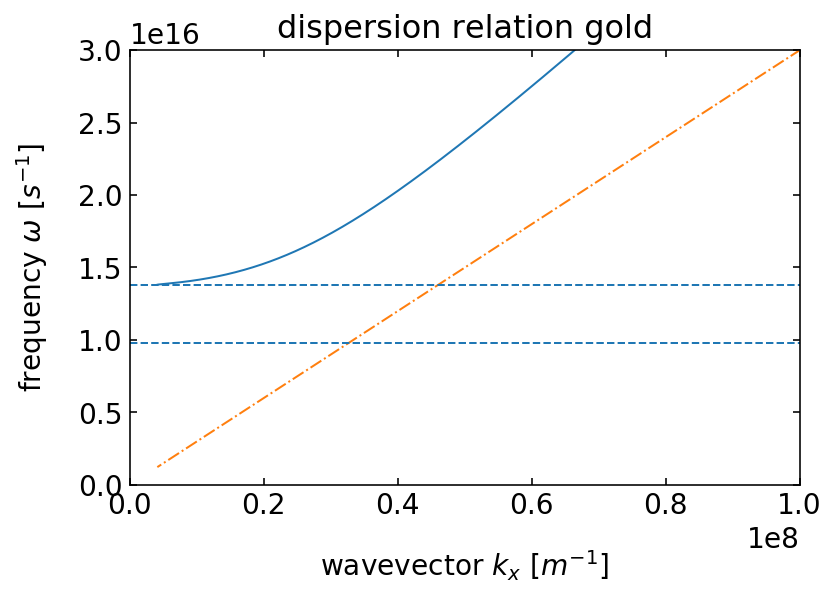

In [41]:
#plt.plot(np.real(kx_low),freq(wavelength_low))
plt.plot(np.abs(kx_plasmon2),om2)
#plt.plot(np.abs(kx_plasmon),om)
plt.plot(np.abs(kx_plasmon2),np.abs(kx_plasmon2)*c,'-.')
plt.axhline(y=np.sqrt(omega_p_d**2-gamma_d**2),linestyle='--',linewidth=1)
plt.axhline(y=omega_spp,linestyle='--',linewidth=1)
plt.xlabel('wavevector $k_{x}$ [$m^{-1}$]')
plt.ylabel('frequency $\omega$ [$s^{-1}$]')
plt.title('dispersion relation gold')
plt.xlim(0,10e7)
plt.ylim(0,3e16)

### Plot the penetration depth

In [42]:
def k_z(epsilon_j,epsilon1,epsilon2,omega):
    c=299792458
    return(np.sqrt(epsilon_j**2/(epsilon_1+epsilon_2)*omega**2/c**2))

In [43]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14

wavelength=np.arange(400,1000,0.1)
om=freq(wavelength)

#dielectric function, complex!
epsilon_1=epsilon_d(freq(wavelength),gamma_d,omega_p_d)
epsilon_2=1

kz_gold=k_z(epsilon_1,epsilon_1,epsilon_2,om)
kz_air=k_z(epsilon_2,epsilon_1,epsilon_2,om)

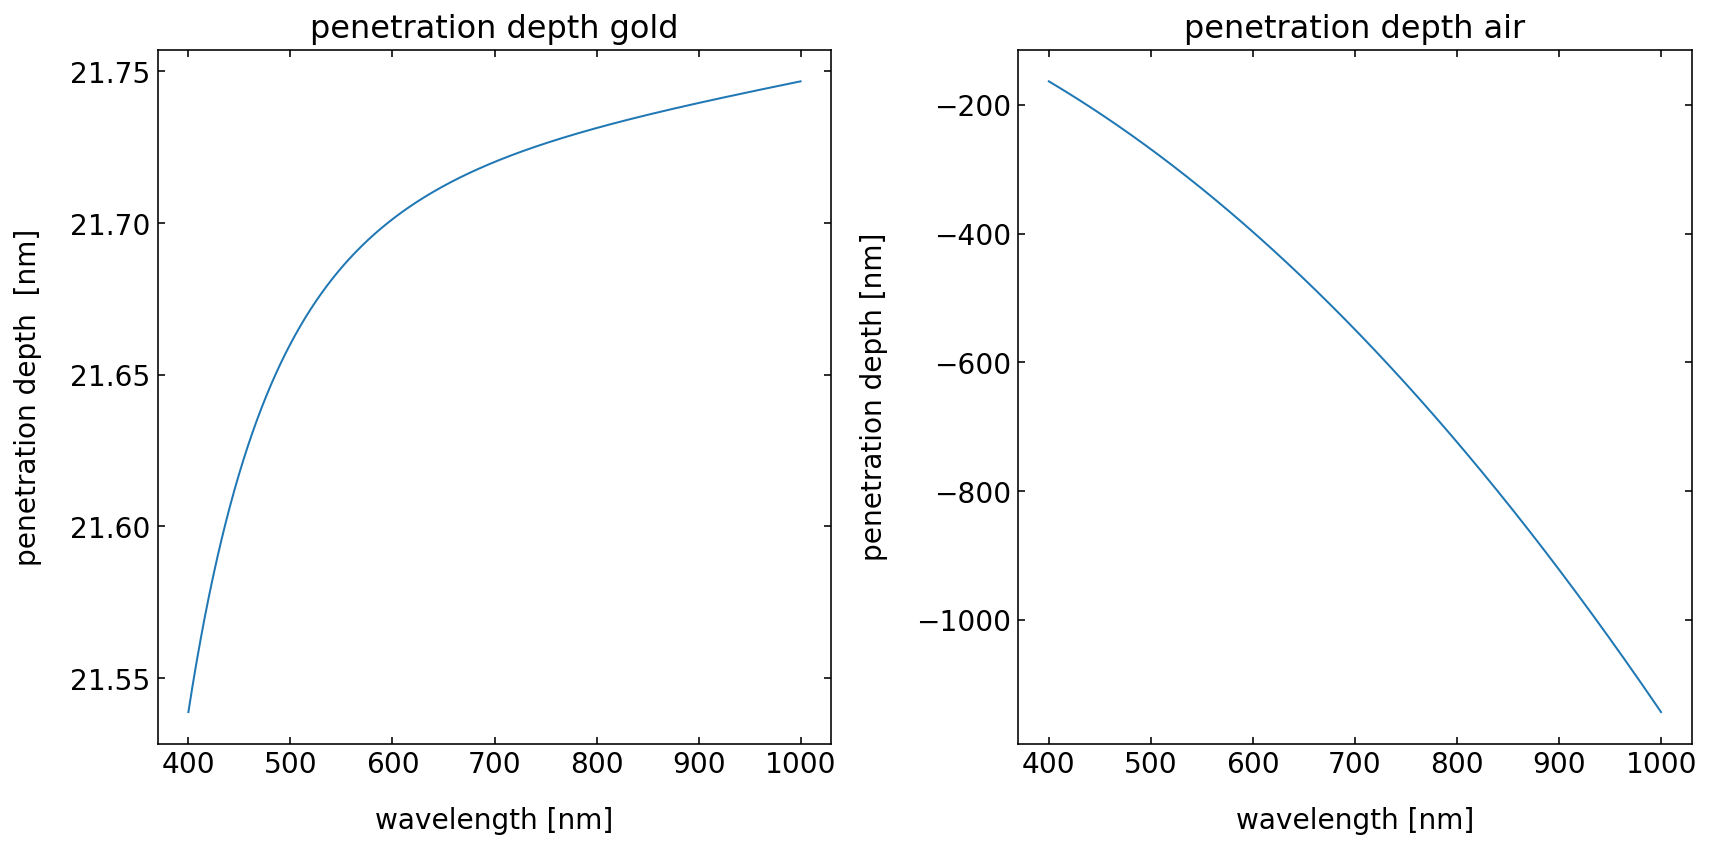

In [44]:
fig=plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('penetration depth gold')
plt.plot(wavelength,1e9/np.imag(kz_gold))
plt.xlabel('wavelength [nm]')
plt.ylabel('penetration depth  [nm]')

plt.subplot(122)
plt.title('penetration depth air')
plt.plot(wavelength,1e9/np.imag(kz_air))
plt.xlabel('wavelength [nm]')
plt.ylabel('penetration depth [nm]')
plt.tight_layout()
plt.show()

## Exciting Surface Plasmons

The above image shows the disperion relation for the surface plasmon and the dispersion relation for free space propagation of light as the dash-dot line. What you might notice, is that both curves do not intersect, but as we noted above, the wavevector along of the surface plasmon and the incident light have to match at the boundary. In other words the momentum of the photon in free space is insufficient to excite the surface plasmon.

The physical reason for the increased momentum of the SPP is the strong coupling between light and surface charges. The light field has to “drag” the electrons along the metal surface. Con- sequently, this means that a SPP on a plane interface cannot be excited by light of any frequency that propagates in free space.

![Figure 2](excitation.png)

Excitation of a SPP by light is only possible if a wavevector component of the exciting light can be increased over its free-space value. There are several ways to achieve this increase of the wavevector component. The conceptually most simple solution is to excite surface plasmons by means of evanescent waves created at the interface between a medium with refractive index $n>1$.

**Otto configuration**

In the Otto configuration the tail of an evanescent wave at a glass/air interface is brought into contact with a metal/air interface that supports SPPs. For a sufficiently large separation between the two interfaces (gapwidth) the evanescent wave is only weakly influenced by the presence of the metal. By tuning the angle of incidence of the totally reflected beam inside the prism, the resonance condition for excitation of SPPs, i.e. the matching of the parallel wavevector com- ponents, can be fulfilled. The excitation of a SPP will show up as a minimum in the reflected light. The reflectivity of the system as a function of the angle of incidence and of the gapwidth


![Figure 3](plasmon_resonance.png)

For the angle of incidence a clear resonance is observed at $43.5^{\circ}$. For a small gapwidth the resonance is broadened and shifted due to radiation damping of the SPP. This is caused by the presence of the glass half-space, which allows the SPP to rapidly decay radiatively by transforming the evanescent SPP field into a propagating field in the glass. For a gapwidth that is too large the SPP can no longer be efficiently excited and the resonance vanishes.

**Kretschmann configuration**

The Kretschmann configuration is an alternative method to excite SPP. In his method, a thin metal film is deposited on top of a prism. To excite a surface plasmon at the metal/air interface an evanescent wave created at the glass/metal interface has to penetrate through the metal layer. Here, similar arguments apply as for the Otto configuration. If the metal is too thin, the SPP will be strongly damped because of radiation damping into the glass. If the metal film is too thick the SPP can no longer be efficiently excited due to absorption in the metal. 

![Figure 4](plasmon_kretschmann.png)

The figure shows the reflectivity of the excitation beam as a function of the metal film thickness and the angle of incidence. As before, the resonant excitation of surface plasmons is characterized by a dip in the reflectivity curves.

## Calculation of the angle dependent reflectivity

The calculation below requires the **tmm** module to be installed. This is a trnasfer matrix method, which allows the calculation of tranmission and reflectivity through multilayer structures. The example shows the plasmon resonance excitation of a thin film (50 nm) at a wavelength of 532 nm in a Kretschmann configuration. To change to other wavelength please adjust the refractive index of the metal for the new wavelength. A database of refractive indices is found at

https://refractiveindex.info




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, inf

%matplotlib inline
degree = pi/180

from tmm import coh_tmm

### Angle dependent reflectivity for a silver layer on glass with air on top

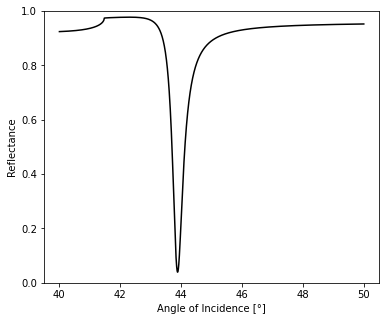

In [2]:
d_list = [inf, 50, inf] # list of layer thicknesses in nm
n_list = [1.51, 0.054007+3.4290*1j, 1] # list of refractive indices with Ag
lda = 532 # wavelength in nm
theta_list = np.linspace(40*degree, 50*degree, 2000) # list of angles to plot
Rp = [] 
for theta in theta_list:
    Rp.append(coh_tmm('p', n_list, d_list, theta, lda)['R'])
    
fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.plot(theta_list/degree, Rp, 'k')
ax.set_xlabel('Angle of Incidence [°]')
ax.set_ylabel('Reflectance')

ax.set_ylim(0, 1)
plt.show()

### Angle dependent reflectivity for a gold layer on glass with air on top

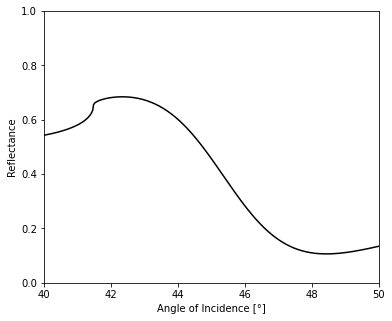

In [3]:
d_list = [inf, 50, inf] # list of layer thicknesses in nm
n_list = [1.51, 0.54386+2.2309*1j, 1] # list of refractive indices with Au

lda = 532 # wavelength in nm
theta_list = np.linspace(40*degree, 90*degree, 2000) # list of angles to plot
Rp = [] 
for theta in theta_list:
    Rp.append(coh_tmm('p', n_list, d_list, theta, lda)['R'])
    
fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.plot(theta_list/degree, Rp, 'k')
ax.set_xlabel('Angle of Incidence [°]')
ax.set_ylabel('Reflectance')
ax.set_xlim(40, 50)
ax.set_ylim(0, 1)
plt.show()

## Surface plasmon sensors

The distinct resonance condition associated with the excitation of surface plasmons has found application in various sensors. For example, the position of the dip in the reflectivity curves can be used as an indicator for environmental changes. With this method, the adsorption or removal of target materials on the metal surface can be detected with submonolayer accuracy. 

![Figure 5](sensor_application.png)

The figure illustrates this capability by a simulation. It shows the effect of a 3 nm layer of water on top of a 53 nm thick silver film on glass. A strongly shifted plasmon resonance curve can be observed. Assuming that the angle of incidence of the excitation beam has been adjusted to the dip in the reflectivity curve, the deposition of a minute amount of material increases the signal (reflectivity) drastically. This means that the full dynamic range of a low-noise intensity measurement can be used to measure a coverage ranging between 0 and 3 nm. Consequently, SPP sensors are very attractive for applications ranging from biological binding assays to environmental sensing.

### Angle dependent reflectivity for a silver layer on glass with water and air on top

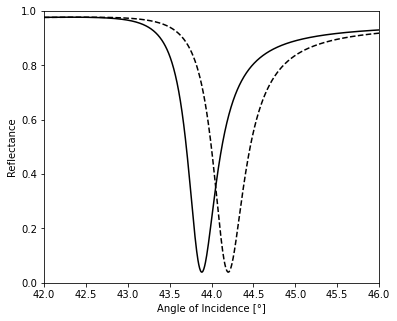

In [4]:
d_list = [inf, 50, inf] # list of layer thicknesses in nm
n_list = [1.51, 0.054007+3.4290*1j, 1] # list of refractive indices with Ag
lda = 532 # wavelength in nm
theta_list = np.linspace(40*degree, 50*degree, 2000) # list of angles to plot
Rp = [] 
for theta in theta_list:
    Rp.append(coh_tmm('p', n_list, d_list, theta, lda)['R'])

d_list = [inf, 50,3, inf] # list of layer thicknesses in nm
n_list = [1.51, 0.054007+3.4290*1j, 1.33,1] # list of refractive indices with Ag
lda = 532 # wavelength in nm
theta_list = np.linspace(40*degree, 50*degree, 2000) # list of angles to plot
Rp1 = [] 
for theta in theta_list:
    Rp1.append(coh_tmm('p', n_list, d_list, theta, lda)['R'])    
    
fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.plot(theta_list/degree, Rp, 'k')
ax.plot(theta_list/degree, Rp1, 'k--',label='with 1 nm water')
ax.set_xlabel('Angle of Incidence [°]')
ax.set_ylabel('Reflectance')
ax.set_xlim(42, 46)
ax.set_ylim(0, 1)
plt.show()

## Plasmons Supported by Spherical Particles - Quasi-Static Approximation

For surface plasmon polaritons propagating on plane interfaces we observed that the electromagnetic field is strongly localized in one dimension, i.e. normal to the interface. In the context of nano-optics we are also interested in establishing field confinement in two or even three dimensions. Therefore it is useful to theoretically analyze the electromagnetic modes associated with thin wires and small particles. In order to keep the analysis simple, we will limit the discussion to the quasi-static approximation which neglects retardation. Thus, it is assumed that all points of an object respond simultaneously to an incoming (excitation) field. This is only true if the characteristic size of the object is much smaller than the wavelength of light. In the quasi-static approximation the Helmholtz equation reduces to the Laplace equation which is much easier to solve. The solutions that are obtained here are the quasi-static near-fields and scattering cross-sections of the considered objects. For example, the electric field of an oscillating dipole

\begin{equation}
{\bf E}(r{\bf n},t)=\frac{1}{4\pi \epsilon_0}\left [k^2({\bf n} \times {\bf \mu})\times {\bf n}\frac{e^{ikr}}{r} + [3{\bf n(n\cdot \mu)}-{\bf \mu}]\left(\frac{1}{r^3}-\frac{i k}{r^2}\right ) e^{ikr}\right ]e^{i\omega t}
\end{equation}


In the near field,i.e. for $kr<<1$, the dipole field can be approximated by 

\begin{equation}
{\bf E}(r{\bf n},t)=\frac{1}{4\pi \epsilon_0}[3{\bf n(n\cdot \mu)}-{\bf \mu}] \frac{e^{i\omega t}}{r^3}
\end{equation}

which is exactly the electrostatic field of a point dipole, only it oscillates in time with $\exp(i\omega t)$,  which is the reason why it is termed quasi-static. In the quasi-static limit the electric field can be represented by a potential as 

\begin{equation}
{\bf E}=-\nabla \Phi.
\end{equation}


The potential has to satisfy the Laplace equation

\begin{equation}
\nabla^{2}\Phi=0
\end{equation}

and the boundary conditions between adjacent materials. In the following we will analyze its solutions for a small metal sphere.

### Plasmon resonance of a small spherical particle

The electric field of a spherical particle in the quasistatic approximation can be found by solving the Laplace equation in spherical coordinates. Essentially this corresponds to the solutions of the angular part of the Schrödinger equation with an ansatz using the Legendre polynomials. To obtain the solutions, one has to match the boundary conditions at the spheres surface, which state that the tangential electric field shall be conserved and the normal field components has a jump according to the dielectric function mismatch.


The electric field can be calculated from (12.45) using ${\bf E}=-\nabla \Phi$ and turns out to be

\begin{equation}
{\bf E}_{1}=E_{0}\frac{3\epsilon_{2}}{\epsilon_{1}+2\epsilon_{2}}(\cos(\theta){\bf n}_{r}-\sin(\theta){\bf n}_{\theta})=E_{0}\frac{3\epsilon_{2}}{\epsilon_{1}+2\epsilon_{2}}{\bf n_{x}}
\end{equation}

which is the field inside the particle. This field is apparently homogeneous, which is contrary to what we have obtained for the planar interfaces. The field inside metal shall according to that decay exponentially with the distance. The above solution thus states that the quasi-static approximation is only valid for particles that are smaller in size than the skin depth $d$ of the metal ($d=\lambda/[4\pi \sqrt{\epsilon}]$).

The field outside the particle is given by 

\begin{equation}
{\bf E}_{2}=E_{0}(\cos(\theta){\bf n}_{r}-\sin(\theta){\bf n}_{\theta})+\frac{\epsilon_{1}-\epsilon_{2}}{\epsilon_{1}+2\epsilon_{2}}\frac{a^3}{r^3}E_{0}(2\cos(\theta){\bf n}_{r}+\sin(\theta){\bf n}_\theta)
\end{equation}

The field outside the particle is therefore a superposition of the incident field (first term) and the field of a dipole located at the center of the sphere. The dipole $\mu=\epsilon_{2}\alpha(\omega){\bf E}_{0}$ is determined by the polarizability 

\begin{equation}
\alpha(\omega)=4\pi \epsilon_{0}a^3\frac{\epsilon_{1}(\omega)-\epsilon_{2}}{\epsilon_{1}(\omega)+2\epsilon_{2}}
\end{equation}


Connecting this to our earlier considerations we can determine the scattering cross-section by 

\begin{equation}
\sigma_{scatt}=\frac{k^4}{6\pi\epsilon_{0}^2}|\alpha(\omega)|^2
\end{equation}

and the absorption cross-section with 

\begin{equation}
\sigma_{abs}=\frac{k}{\epsilon_{0}}Im[\alpha(\omega)]
\end{equation}



In [14]:
epsilon=epsilon_I(freq(wavelength),gamma_I,omega_p_I,omega_0)

In [15]:
# this is the total epsilon contain one interband and and the intraband transitions
eps_all=epsilon+epsilon_d(freq(wavelength),gamma_d,omega_p_d)

In [16]:
np.size(wavelength)

700

In [17]:
# give some parameters
a=20e-9 # size of the NP

epsilon_0=8.85418782e-12
epsilon_2=1.33**2

alpha=4*np.pi*epsilon_0*a**3*(eps_all-epsilon_2)/(eps_all+2*epsilon_2)
k=2*np.pi/wavelength/1e-9

In [18]:
# calculate the cross section from the quasi-static approximation

sigma_scat_glass=k**4*np.abs(alpha)**2/6/np.pi/epsilon_0**2
sigma_abs_glass=k*np.imag(alpha)/epsilon_0

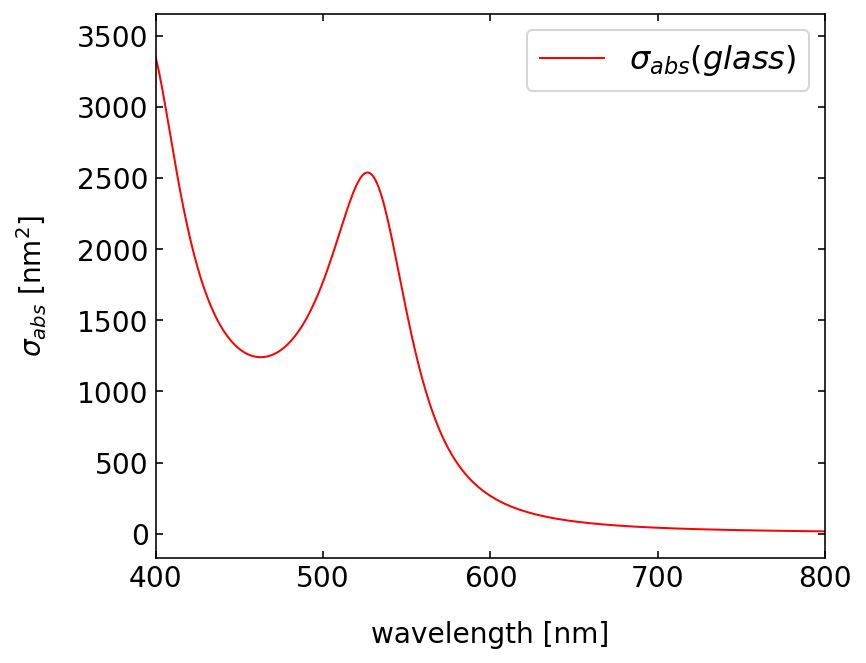

In [19]:
plt.figure(figsize=(6,5))
#plt.plot(wavelength,sigma_abs_air*1e18,'b-',label=r'$\sigma_{abs}(air)$')
plt.plot(wavelength,sigma_abs_glass*1e18,'r-',label=r'$\sigma_{abs}(glass)$')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\sigma_{abs}$ [nm$^2$]')
plt.legend()
plt.xlim(400,800)
#plt.ylim(0,4e3)
plt.show()

### Comparison to Mie scattering calculations

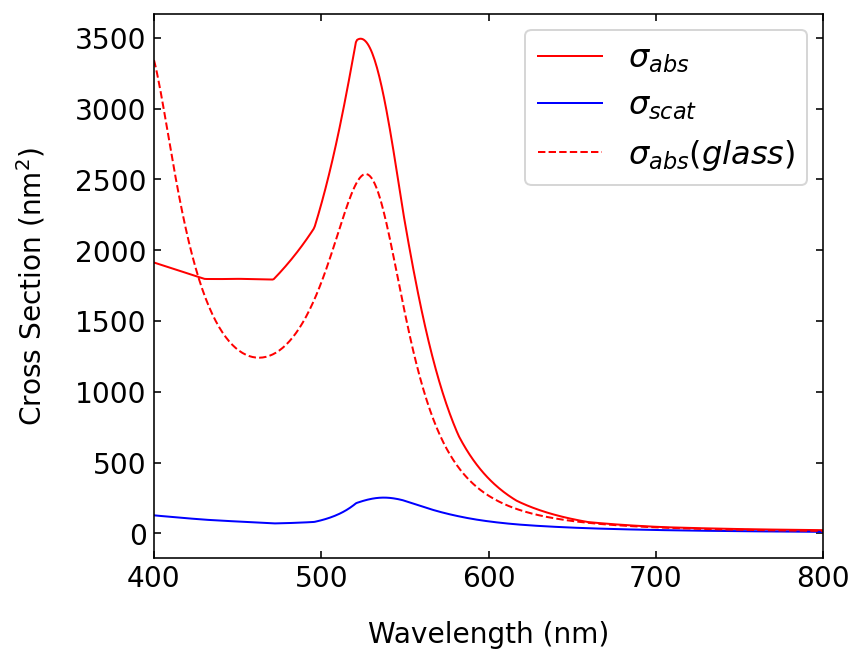

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import miepython

# from https://refractiveindex.info/?shelf=main&book=Au&page=Johnson
# wavelength in microns
ref_lam=np.array([0.1879,0.1916,0.1953,0.1993,0.2033,0.2073,0.2119,0.2164,0.2214,0.2262,0.2313,0.2371,0.2426,0.2490,0.2551,0.2616,0.2689,0.2761,0.2844,0.2924,0.3009,0.3107,0.3204,0.3315,0.3425,0.3542,0.3679,0.3815,0.3974,0.4133,0.4305,0.4509,0.4714,0.4959,0.5209,0.5486,0.5821,0.6168,0.6595,0.7045,0.7560,0.8211,0.8920,0.9840,1.0880,1.2160,1.3930,1.6100,1.9370])
ref_n=np.array([1.28,1.32,1.34,1.33,1.33,1.30,1.30,1.30,1.30,1.31,1.30,1.32,1.32,1.33,1.33,1.35,1.38,1.43,1.47,1.49,1.53,1.53,1.54,1.48,1.48,1.50,1.48,1.46,1.47,1.46,1.45,1.38,1.31,1.04,0.62,0.43,0.29,0.21,0.14,0.13,0.14,0.16,0.17,0.22,0.27,0.35,0.43,0.56,0.92])
ref_k=np.array([1.188,1.203,1.226,1.251,1.277,1.304,1.350,1.387,1.427,1.460,1.497,1.536,1.577,1.631,1.688,1.749,1.803,1.847,1.869,1.878,1.889,1.893,1.898,1.883,1.871,1.866,1.895,1.933,1.952,1.958,1.948,1.914,1.849,1.833,2.081,2.455,2.863,3.272,3.697,4.103,4.542,5.083,5.663,6.350,7.150,8.145,9.519,11.21,13.78])


#interpolate refractive index data
inter_lam=np.linspace(0.300,1.00,1000)
inter_n=np.interp(inter_lam, ref_lam, ref_n)
inter_k=np.interp(inter_lam, ref_lam, ref_k)

radius = 0.02               # in microns
num = len(inter_lam)
n_env=1.33 #water around
m = (inter_n-1.0j*inter_k)
x = 2*np.pi*radius/(inter_lam/n_env)

qqabs = np.zeros(num)
qqsca = np.zeros(num)

for i in range(num) :
    qext, qsca, qback, g = miepython.mie(m[i]/n_env,x[i])
    qabs = qext - qsca
    qqabs[i]=qabs*np.pi*radius**2
    qqsca[i]=qsca*np.pi*radius**2
  
plt.figure(figsize=(6,5))
plt.plot(inter_lam*1000, qqabs*1e6, 'r-',label='$\sigma_{abs}$')
plt.plot(inter_lam*1000, qqsca*1e6, 'b-',label='$\sigma_{scat}$')
#plt.plot(inter_lam*1000, qqsca*1e6, color='red',label='scattering')
plt.plot(wavelength,sigma_abs_glass*1e18,'r--',label=r'$\sigma_{abs}(glass)$')



#plt.title(r"Gold Spheres {} nm diameter".format(2*radius*1000))
plt.xlabel("Wavelength (nm)")
plt.ylabel(r"Cross Section (nm$^2$)")
plt.legend()
plt.xlim(400,800)
#plt.ylim(0,15000)
plt.show()

### Radiation Pressure


The radiation pressure is given by [e.g., Kerker, p. 94] $$
Q_{pr}=Q_{ext}-g Q_{sca}
$$ and is the momentum given to the scattering particle [van de Hulst, p. 13] in the direction of the incident wave. The radiation pressure cross section $C_{pr}$ is just the efficiency multiplied by the geometric cross section
$$
C_{pr} = \pi r_0^2 Q_{pr}
$$
The radiation pressure cross section $C_{pr}$ can be interpreted as the area of a black wall that would receive the same force from the same incident wave. The actual force on the particle is is $$
F = E_0 \frac{C_{pr}}{c}
$$ where $E_0$ is the irradiance (W/m$^2$) on the sphere and $c$ is the velocity of the radiation in the medium

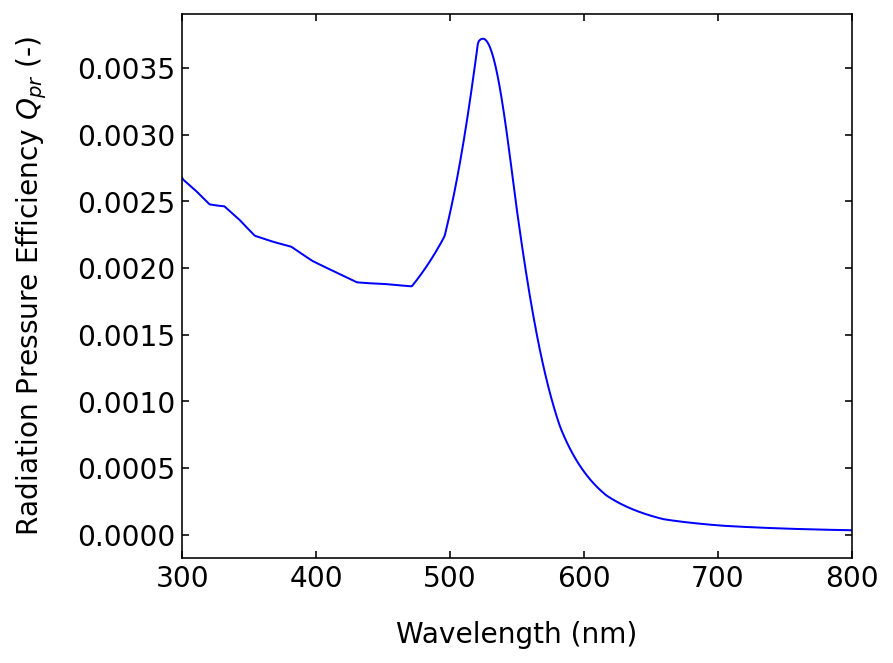

In [52]:
# from https://refractiveindex.info/?shelf=main&book=Au&page=Johnson
# wavelength in microns
ref_lam=np.array([0.1879,0.1916,0.1953,0.1993,0.2033,0.2073,0.2119,0.2164,0.2214,0.2262,0.2313,0.2371,0.2426,0.2490,0.2551,0.2616,0.2689,0.2761,0.2844,0.2924,0.3009,0.3107,0.3204,0.3315,0.3425,0.3542,0.3679,0.3815,0.3974,0.4133,0.4305,0.4509,0.4714,0.4959,0.5209,0.5486,0.5821,0.6168,0.6595,0.7045,0.7560,0.8211,0.8920,0.9840,1.0880,1.2160,1.3930,1.6100,1.9370])
ref_n=np.array([1.28,1.32,1.34,1.33,1.33,1.30,1.30,1.30,1.30,1.31,1.30,1.32,1.32,1.33,1.33,1.35,1.38,1.43,1.47,1.49,1.53,1.53,1.54,1.48,1.48,1.50,1.48,1.46,1.47,1.46,1.45,1.38,1.31,1.04,0.62,0.43,0.29,0.21,0.14,0.13,0.14,0.16,0.17,0.22,0.27,0.35,0.43,0.56,0.92])
ref_k=np.array([1.188,1.203,1.226,1.251,1.277,1.304,1.350,1.387,1.427,1.460,1.497,1.536,1.577,1.631,1.688,1.749,1.803,1.847,1.869,1.878,1.889,1.893,1.898,1.883,1.871,1.866,1.895,1.933,1.952,1.958,1.948,1.914,1.849,1.833,2.081,2.455,2.863,3.272,3.697,4.103,4.542,5.083,5.663,6.350,7.150,8.145,9.519,11.21,13.78])


#interpolate refractive index data
inter_lam=np.linspace(0.300,1.00,1000)
inter_n=np.interp(inter_lam, ref_lam, ref_n)
inter_k=np.interp(inter_lam, ref_lam, ref_k)

radius = 0.02               # in microns
num = len(inter_lam)
n_env=1.33 #water around
m = (inter_n-1.0j*inter_k)
x = 2*np.pi*radius/(inter_lam/n_env)

qpr = np.zeros(num)

for i in range(num) :
    qext, qsca, qback, g = miepython.mie(m[i]/n_env,x[i])
    qpr[i]=qext-g*qsca

plt.figure(figsize=(6,5))

plt.plot(inter_lam*1000,qpr*np.pi*radius**2,color='blue')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Radiation Pressure Efficiency $Q_{pr}$ (-)")

plt.xlim(300,800)
#plt.ylim(1,2.5)
plt.show()

More on optical forces on optical nanoparticles can also be found in the Jupyter Notebooks of the Molecular Nanophotonics Group at:

~~~
https://github.com/Molecular-Nanophotonics/Jupyter-Notebooks/blob/master/Optics/Optical_Forces_Metal_Nanoparticles.ipynb
~~~


As expected, the scattering cross-section scales with the square of the volume and the absorption cross-section only with the volume. Consequently, for large particles extinction is dominated by scattering whereas for small particles it is associated with absorption. This effect can be used to detect extremely small metal particles down to 2.5 nm diameter which are used as labels in biological samples. The transition between the two size regimes is characterized by a distinct color change. For example, small gold particles absorb green and blue light and thus render a red color. On the other hand, larger gold particles scatter predominantly in the green and hence render a greenish color. A very nice illustration of these findings is colored glasses. The famous Lycurgus cup (see below) was made by ancient Roman artists and is today exhibited at the British Museum, London. When illuminated by a white source from behind, the cup shows an amazingly rich shading of colors ranging from deep green to bright red. For a long time it was not clear what causes these colors. Today it is known that they are due to nanometer-sized gold particles embedded in the glass. The colors are determined by an interplay of absorption and scattering.


![Figure 2](Lycurgus.png)

### Ellispoids

Calculation get a bit more complicated in the case of nonspherical particles and only in a few cases an analytical expression can be obtained. In the case of [ellipsoids](https://www.sciencedirect.com/science/article/pii/S0010854505000287#fig6), which are very close to rods already, one can write down an expression for the polarizability of an ellipsoid

\begin{equation}
\alpha_{x,y,z}=4\pi \epsilon_{0}abc \frac{\epsilon_1(\omega)-\epsilon_2}{3\epsilon_{2}+3L_{x,y,z}(\epsilon_{1}(\omega)-\epsilon_{2})}
\end{equation}

Here a, b and c refer to the length of the ellipse along the x, y and z axes (a > b = c), $\epsilon_1$ the dielectric function of the metal, $\epsilon_2$ to the dielectric constant of the medium at optical frequencies and $L_{x,y,z}$ is the depolarization factor for the respective axis, which is given by

\begin{equation}
L_{x}=\frac{1-e^2}{e^2}\left (-1+\frac{1}{2e}\ln \frac{1+e}{1-e} \right)
\end{equation}

\begin{equation}
L_{y,z}=\frac{1-L_{x}}{2}
\end{equation}

with te ellipticity $e^2=1-(b/a)^2$. For $e=0$ the result is a sphere and $L=1/3$.

In [62]:
R=20e-9
V=4*np.pi*R**3/3
b=1
a=1.3
esq=1-(b/a)**2
e=np.sqrt(esq)
L=(1-esq)/esq*(-1+1/(2*e)*np.log((1+e)/(1-e)))

In [63]:
alpha=4*np.pi*epsilon_0*V*(eps_all-epsilon_2)/(3*epsilon_2+3*L*(eps_all-epsilon_2))
sigma_abs_glass=k*np.imag(alpha)/epsilon_0

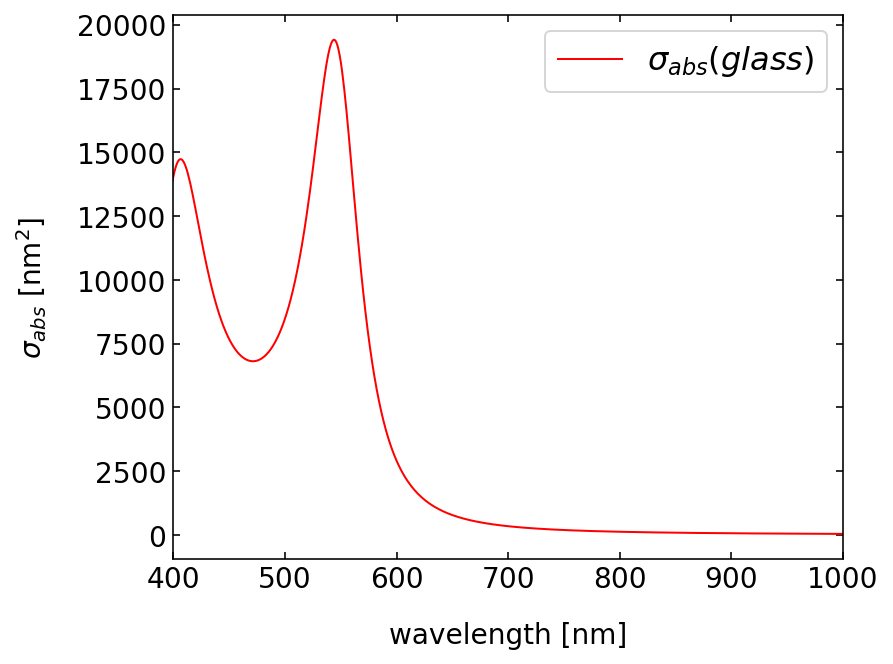

In [64]:
plt.figure(figsize=(6,5))
#plt.plot(wavelength,sigma_abs_air*1e18,'b-',label=r'$\sigma_{abs}(air)$')
plt.plot(wavelength,sigma_abs_glass*1e18,'r-',label=r'$\sigma_{abs}(glass)$')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\sigma_{abs}$ [nm$^2$]')
plt.legend()
plt.xlim(400,1000)
#plt.ylim(0,4e3)
plt.show()

### Interactions of particle plasmons

The resonance condition of a particle plasmon depends sensitively on the dielec- tric constant of the environment. Thus, similar to the case of a plane interface, a gold or silver particle can be used as a sensing element since its resonance will shift upon local dielectric changes, e.g. due to the specific binding of certain lig- ands after chemical functionalization of the particle’s surface. The advantage of using particle resonances as opposed to resonances of plane interfaces is associ- ated with the much smaller dimensions of the particle and hence the larger surface to volume ratio. One can envision anchoring differently functionalized particles onto substrates at extremely high densities and using such arrangements as sensor chips for multiparameter sensing of various chemical compounds, as demonstrated by the detection of single base pair mismatches in DNA.

### Chains of metal nanoparticles, waveguides

An interesting and insightful application is the coupling of gold nanoparticles to chains of nanoparticles as described by [Brongersma]( http://journals.aps.org/prb/abstract/10.1103/PhysRevB.62.R16356) . Due to the near field of these particles, neighboring particles couple and give rise to a plasmon wave with a new dispersion relation. We will shortly have a look at such a chain of particles. Suppose we have such a chain 

![Figure 3](chain_o_particles.png)

where $i$ denotes the polarization and $m$ denotes the position of the particle in the chain. The dipole moment of that particle is given by $p_{i,m}(t)$ and depends on time. The particles in this chain are coupled by the electric fields and we assume a Förster coupling i.e. $E_{F}\propto R^{-3}$.

If the particles are seperated by a distance $d$ then a particle {$i,m$} produces at its neigbors an electric field

\begin{equation}
E_{i,m}(t)=\frac{\gamma_{i}p_{i,m}(t)}{4\pi\epsilon_0 \epsilon d^3}
\end{equation}

Here $\gamma_{i}$ is a polarization dependent factor, i.e. $\gamma_{T}=1$ and $\gamma_{L}=-2$. If we now assume only nearest neighbor interactions then the equation of motion for the dipoles in the chain is given by


\begin{equation}
\ddot{p}_{i,m}=-\omega_{0}^2p_{i,m}-\Gamma_l\dot{p}_{i,m}+\frac{\Gamma_{R}}{\omega_{0}^2}\dddot{p}_{i,m}-\gamma_{i}\omega_{1}^2(p_{i,m-1}+p_{i,m+1})
\end{equation}

Equivalent to a chain of coupled oscillators, this differential equation yields propagating solutions

\begin{equation}
p_{i,m}=P_{i,0}e^{-\alpha m d+i(\omega t \pm k m d)}
\end{equation}

with either parallel (minus sign) or antiparallel (plus sign) phase and group velocity.
Inserting this into the equation of motion yields the dispersion relation 

\begin{equation}
    \omega^2=\omega_{0}^2+2\gamma_{i}\omega_{1}^2 \cos(k d)\cosh(\alpha d)
\end{equation}

For small damping $(\alpha d<<1)$ this reduces to 

\begin{equation}
    \omega^2=\omega_{0}^2+2\gamma_{i}\omega_{1}^2 \cos(k d)
\end{equation}

Note that $\omega_{0}$ is the resonance oscillation of a single dipole and $\omega_{1}$ quantifies the strength of the coupling of neighboring dipoles. According to the polarization $i={L,T}$ two branches exist, which have different spectral width and different group velocities

\begin{equation}
v_{g,i}=\frac{d\omega}{d k}=\gamma_{i}\omega_{1}^2\sin(k d)/\omega
\end{equation}

From that, it can be easily seen, that the waves in the logitudinal branch (L) propagate faster than in the transverse (T). The dispersion relation for the small damping case is shown in the following Figure 

![Figure 4](dispersion.png)

With the help of such particle chains, waveguides and beam splitters may be easily created. Due to the directionality of the dipole, also such beam splitters are polarizing beam splitters.

![Figure 5](waveguide.png)
